TensorFlow

1.測試TF

In [3]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
sess.run(hello)
#print(sess.run(hello))

b'Hello, TensorFlow!'

2.使用GradientDescent計算回歸係數

In [11]:
import tensorflow as tf
import numpy as np

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
#tf.zeros([1]) 一次生成一個 tf.zeros([1,10]) [0], [0], ...[0] #
y = w * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = opt.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)


for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step ,sess.run(w), sess.run(b))


#sess.run(train)
#print(sess.run(w), sess.run(b))

sess.close()

0 [-0.40208578] [ 0.90925348]
20 [-0.10502608] [ 0.42126584]
40 [ 0.03420851] [ 0.33891341]
60 [ 0.07888795] [ 0.31248707]
80 [ 0.09322527] [ 0.30400702]
100 [ 0.09782604] [ 0.30128583]
120 [ 0.09930238] [ 0.30041263]
140 [ 0.09977613] [ 0.30013242]
160 [ 0.09992817] [ 0.30004251]
180 [ 0.09997696] [ 0.30001363]
200 [ 0.09999262] [ 0.30000439]


3.比較線性迴歸尋找回歸係數

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

lm = LinearRegression()
lm.fit(np.reshape(x_data, (len(x_data), 1)), np.reshape(y_data, (len(y_data), 1)))
#lm.fit(x_data, y_data)  ~no~
print(lm.coef_)

print(lm.intercept_ )

[[ 0.1]]
[ 0.30000004]


4.使用TF進行矩陣計算

In [208]:
mat_1 = tf.constant([[1,3]])
mat_2 = tf.constant([[2,3],[3,1]])

pro = tf.matmul(mat_1, mat_2)


#1
#sess = tf.Session()

#res = sess.run(pro)
#print(res)

#sess.close()


#2
#with tf.Session() as sess:
#    res = sess.run([pro])
#    print(res)


#3
sess = tf.InteractiveSession()

mat_31 = tf.Variable([[1,3]])
mat_32 = tf.Variable([[2,3],
                     [3,1]])

#mat_31.initializer.run()
#mat_32.initializer.run()

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
mul = tf.matmul(mat_31, mat_32)
print(sess.run(mul))

#pro = tf.matmul(mat_31, mat_32)
#print(pro.eval())

sess.close()



[[11  6]]


In [106]:
state = tf.Variable(0, name = "counter")

one = tf.constant(1)
new_value = tf.add(state, one)
state_upda = tf.assign(state, new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for i in range(3):
        print(sess.run(state_upda))
    


#sess = tf.Session()
#sess.run(init)
#for i in range(20):
#    print(sess.run(state_upda))
#    print(sess.run(state))
#sess.close()   



0
1
2
3


5.變數輸入與輸出

In [112]:
input_1 = tf.placeholder(tf.float32)
input_2 = tf.placeholder(tf.float32)

input_1 = tf.constant([3])
input_2 = tf.constant([7])

add = tf.add(input_1, input_2)
mul = tf.multiply(input_1, input_2)

with tf.Session() as sess:
    print(sess.run([add, mul]))




#with tf.Session() as sess:
#    print(sess.run([mul], feed_dict = {input_1: [7], input_2: [3]}))


[array([10], dtype=int32), array([21], dtype=int32)]


TensorBoard

嘗試寫隱藏層

In [269]:
def add_layer(input_data, input_tensors, outpt_tensors, activation_function = None):
    w = tf.Variable(tf.random_normal([input_tensors, outpt_tensors]))
    b = tf.Variable(tf.zeros([1, outpt_tensors]))
    formu = tf.add(tf.matmul(input_data, w), b)
    if activation_function is None:
        output = formu
    else:
        output = activation_function(formu)
    return output        


x_data = np.random.rand(100)
x_data = x_data.reshape(len(x_data), 1)
y_data = x_data * 0.1 + 0.3

x_feeds = tf.placeholder(tf.float32, shape = [None, 1])
y_feeds = tf.placeholder(tf.float32, shape = [None, 1])

hidden_layer = add_layer(x_feeds, input_tensors = 1, outpt_tensors = 10, activation_function = None)
outer_layer  = add_layer(hidden_layer, input_tensors = 10, outpt_tensors = 1, activation_function = None)

loss = tf.reduce_mean(tf.square(y_feeds - outer_layer))
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
tra_res = opt.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

for i in range(190):
    sess.run(tra_res, feed_dict= {x_feeds: x_data, y_feeds: y_data})
    if i % 20 == 0:
        print(sess.run(loss, feed_dict = {x_feeds: x_data, y_feeds: y_data}))

sess.close()

0.246841
0.0205885
0.00506145
0.00124511
0.000306352
7.5381e-05
1.85469e-05
4.56456e-06
1.12296e-06
2.76382e-07


利用tensorboard將之視覺化

In [270]:
def add_layer(input_data, input_tensors, outpt_tensors, activation_function = None):
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            w = tf.Variable(tf.random_normal([input_tensors, outpt_tensors]))
        with tf.name_scope('Biases'):
            b = tf.Variable(tf.zeros([1, outpt_tensors]))
        with tf.name_scope('Formula'):
            formu = tf.add(tf.matmul(input_data, w), b)
        if activation_function is None:
            output = formu
        else:
            output = activation_function(formu)
        return output        

x_data = np.random.rand(100)
x_data = x_data.reshape(len(x_data), 1)
y_data = x_data * 0.1 + 0.3

with tf.name_scope('Feeds'):
    x_feeds = tf.placeholder(tf.float32, shape = [None, 1])
    y_feeds = tf.placeholder(tf.float32, shape = [None, 1])

hidden_layer = add_layer(x_feeds, input_tensors = 1, outpt_tensors = 10, activation_function = None)
outer_layer  = add_layer(hidden_layer, input_tensors = 10, outpt_tensors = 1, activation_function = None)

with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.square(y_feeds - outer_layer))
with tf.name_scope('Train'):
    opt = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
    tra_res = opt.minimize(loss)
    
init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

write = tf.summary.FileWriter("TensorBoard/", graph = sess.graph)

for i in range(190):
    sess.run(tra_res, feed_dict= {x_feeds: x_data, y_feeds: y_data})
    if i % 20 == 0:
        print(sess.run(loss, feed_dict = {x_feeds: x_data, y_feeds: y_data}))

sess.close()

0.762244
0.0212164
0.0123959
0.00726598
0.00426266
0.00250209
0.00146919
0.000862887
0.000506871
0.000297778


! pip3 install tensorboard、localhost:6006、Tingde-MacBook-Pro:pythonjupyter ting$ tensorboard --logdir TensorBoard/

玩mnist資料並建造分類器辨識之

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
3


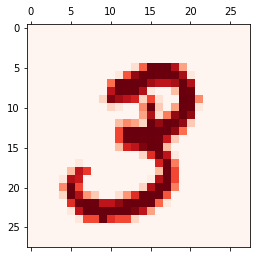

In [168]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist  = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_tra  = mnist.train.images
y_tra  = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

#print(x_tra[1,:])

print(np.argmax(y_tra[1,:], axis = 0))

first_tra_img = np.reshape(x_tra[1, :], (28, 28))
plt.matshow(first_tra_img,cmap = plt.get_cmap('Reds'))
plt.show()

#理解資料型態＃
'''
type(y_tra)
type(x_tra)
np.shape(y_tra)
np.shape(x_tra)
y_tra[1,:]
first_tra_img = np.reshape(x_tra[1, :], (28, 28))
'''




In [176]:
learning_rate = 0.5
training_steps = 1000
batch_size = 100
logs_path = 'TensorBoard/'
n_features = x_train.shape[1]
n_labels = y_train.shape[1]


with tf.name_scope('Inputs'):
    x = tf.placeholder(tf.float32, [None, n_features], name = 'Input_Data')
with tf.name_scope('Labels'):
    y = tf.placeholder(tf.float32, [None, n_labels], name = 'Label_Data')


with tf.name_scope('ModelParameters'):
    W = tf.Variable(tf.zeros([n_features, n_labels]), name = 'Weights')
    b = tf.Variable(tf.zeros([n_labels]), name = 'Bias')


with tf.name_scope('Model'):
    prediction = tf.nn.softmax(tf.matmul(x, W) + b)
with tf.name_scope('CrossEntropy'):
    loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(prediction), reduction_indices = 1))
    tf.summary.scalar("Loss", loss)
with tf.name_scope('GradientDescent'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
with tf.name_scope('Accuracy'):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar('Accuracy', acc)


init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

merged = tf.summary.merge_all()
writer = tf.summary.FileWriter(logs_path, graph = tf.get_default_graph())

for step in range(training_steps):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    sess.run(optimizer, feed_dict = {x: batch_xs, y: batch_ys})
    if step % 50 == 0:
        print(sess.run(loss, feed_dict = {x: batch_xs, y: batch_ys}))
        summary = sess.run(merged, feed_dict = {x: batch_xs, y: batch_ys})
        writer.add_summary(summary, step)

print("---")

print("Accuracy: ", sess.run(acc, feed_dict={x: x_test, y: y_test}))

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1.67311
0.356003
0.386282
0.432872
0.355879
0.225063
0.311063
0.280701
0.335932
0.161922
0.21674
0.278052
0.365288
0.396833
0.151868
0.216886
0.12562
0.204515
0.188744
0.248115
---
Accuracy:  0.9194
